In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.interpolate import interp1d

In [2]:
def deltat(time,ch1,ch2):
    half1= max(ch1)/2
    half2= max(ch2)/2
    i=0
    while ch1[i]<half1:
        i=i+1
    j=0
    while ch2[j]<half2:
        j=j+1
    t1= time[i]
    t2= time[j]
    dt= time[j]-time[i]
    return dt, t1 ,t2

def tot(time, ch):
    half= (max(ch)-min(ch))/2 + min(ch) #find half point of the rise
    i=0
    while ch[i]<half: #find the element which is higher then the halfpoint
        i=i+1
    x1= [time[i-1],time[i]]
    y1= [ch[i-1],ch[i]]
    xnew1= np.linspace(time[i-1],time[i],200)
    f1 = interp1d(x1, y1)#linearly interpolate of these two points
    ynew1= f1(xnew1)
    k=0
    while ynew1[k]<half:
        k=k+1#find the right point of the interpolation
    j=i+30 #no do the same for the falling edge
    while ch[j]>half:
        j=j+1
    
    x2= [time[j-1],time[j]]
    y2= [ch[j-1],ch[j]]
    xnew2= np.linspace(time[j-1],time[j],200)
    f2 = interp1d(x2, y2)
    ynew2= f2(xnew2)
    z=0
    while ynew2[z]<half:
        z=z+1
    tott= xnew2[z]- xnew1[k]#calculate the tot
    return tott

In [3]:
a=glob.glob("/data/detrd/ukraemer/osci_data/cal_scan_P0_99V_P16_6ms_W50us_B100V/*")

a= sorted(a)

len(a)

112034

In [4]:
pixelnames=[]
temp=[]
for i in range(len(a)):
    if i==0:
        temp.append(a[i])
    elif a[i]==a[-1]:
        temp.append(a[i])
        pixelnames.append(temp)
    elif a[i][76:82]==a[i-1][76:82]:
        temp.append(a[i])
    else:
        pixelnames.append(temp)
        temp=[]
        temp.append(a[i])

In [5]:
temp=[]
for i in range(3):
    f= h5py.File(a[i])
    temp.append(f)
time=np.array(temp[1]["Time"])

In [6]:
%%time
pixelsmin=[]
pixelsmax=[]


for i in range(len(pixelnames)):
    temp2=[]
    temp3=[]
    for j in range(len(pixelnames[i])):
        temp1=h5py.File(pixelnames[i][j])
        ch2= temp1["Voltage_CHAN2"]
        ch2= np.array(ch2)
        temp2.append(np.min(ch2))
        temp3.append(np.max(ch2))
    pixelsmin.append(temp2)
    pixelsmax.append(temp3)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
CPU times: user 1min 20s, sys: 24.1 s, total: 1min 45s
Wall time: 8min 14s


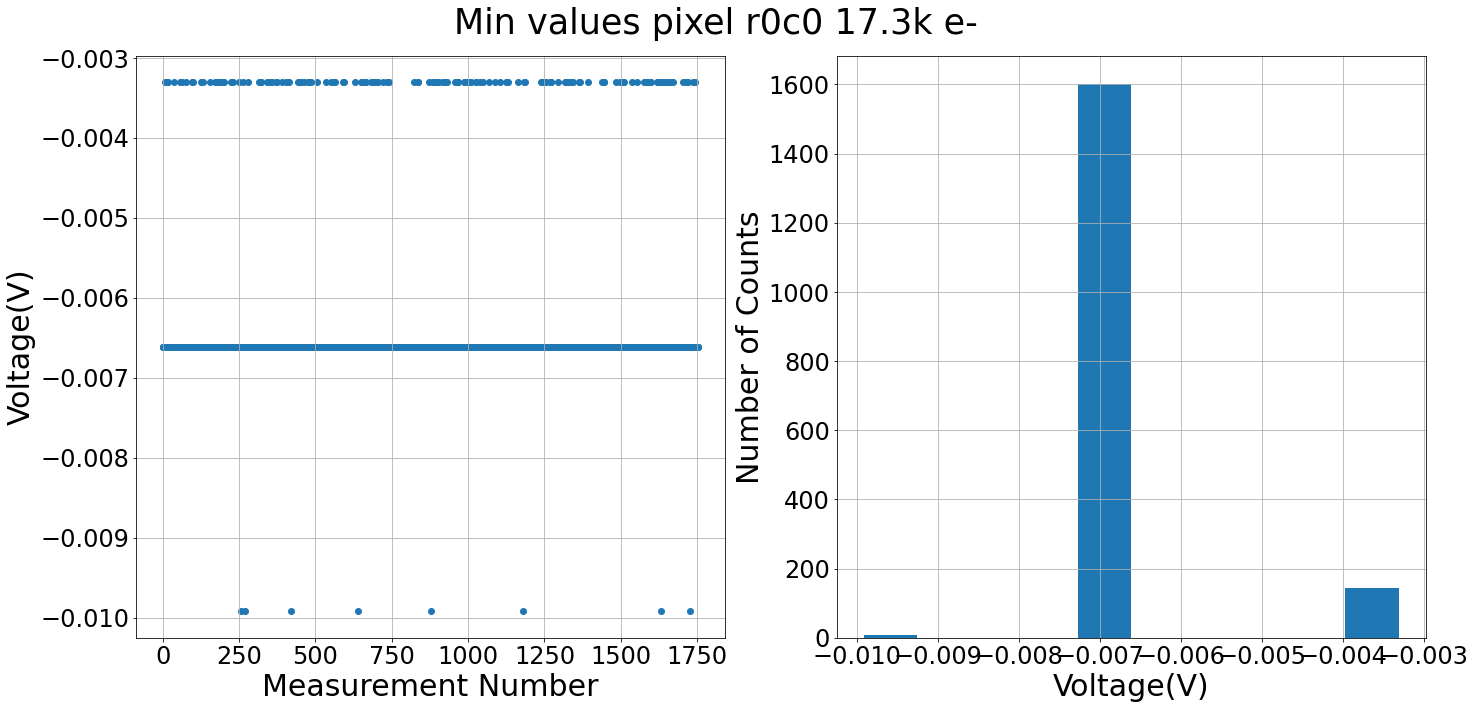

In [14]:
j=0

numb = np.linspace(0,len(pixelsmin[j]),len(pixelsmin[j]))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle('Min values pixel r0c0 17.3k e-',fontsize=35)
ax1.scatter(numb,np.asarray(pixelsmin[j]))
ax1.set_xlabel("Measurement Number",fontsize=30)
ax1.set_ylabel("Voltage(V)",fontsize=30)
ax1.grid()
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)





ax2.hist(np.asarray(pixelsmin[j]))
ax2.set_xlabel("Voltage(V)",fontsize=30)
ax2.set_ylabel("Number of Counts",fontsize=30)
ax2.grid()
ax2.xaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)



plt.tight_layout()
plt.savefig("histogram_min4.png", dpi=150)

plt.show()



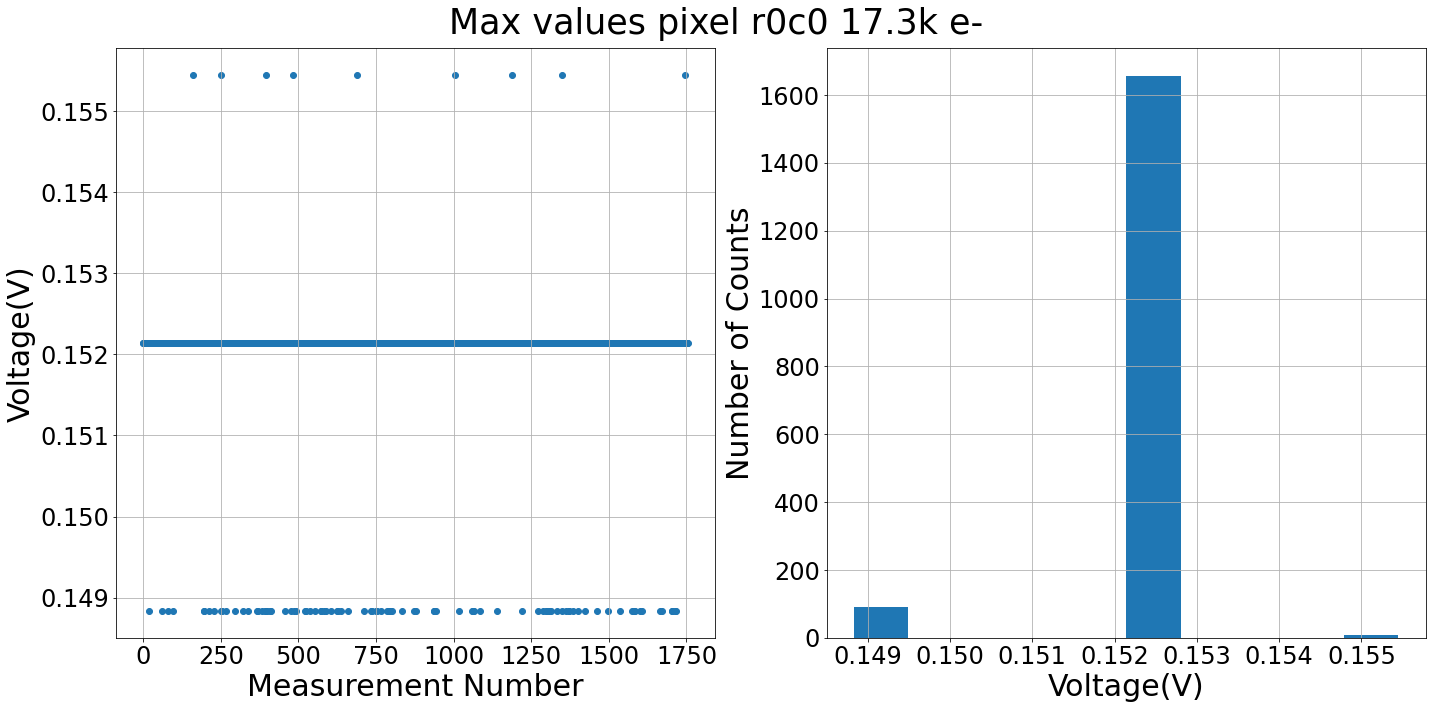

In [15]:


numb = np.linspace(0,len(pixelsmin[j]),len(pixelsmin[j]))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
fig.suptitle('Max values pixel r0c0 17.3k e-',fontsize=35)
ax1.scatter(numb,np.asarray(pixelsmax[j]))
ax1.set_xlabel("Measurement Number",fontsize=30)
ax1.set_ylabel("Voltage(V)",fontsize=30)
ax1.grid()
ax1.xaxis.set_tick_params(labelsize=24)
ax1.yaxis.set_tick_params(labelsize=24)





ax2.hist(np.asarray(pixelsmax[j]))
ax2.set_xlabel("Voltage(V)",fontsize=30)
ax2.set_ylabel("Number of Counts",fontsize=30)
ax2.grid()
ax2.xaxis.set_tick_params(labelsize=24)
ax2.yaxis.set_tick_params(labelsize=24)



plt.tight_layout()

plt.savefig("histogram_max4.png", dpi=150)

plt.show()


In [9]:
len(pixelsmin[j])

1760

In [10]:
len(numb)

1760

In [11]:
numb = np.linspace(0,len(pixelsmin[j]),len(pixelsmin[j]))
